In [35]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import io
import datetime

df = pd.read_csv('Manaus.csv', sep=';', encoding='latin-1')

#Limpeza
cleaned_data = df[['_idade','_sexo','_bairro','_classificacao','_conclusao','_dt_notificacao','_teste_pcr','_teste_anticorpo','_teste_antigeno','_teste_igm','_teste_igg','_faixa etária']]
cleaned_data = cleaned_data.dropna()
cleaned_data = cleaned_data.reset_index(drop=True)
df = cleaned_data

c:\users\luiz fabio\appdata\local\programs\python\python38-32\lib\site-packages\IPython\core\interactiveshell.py:3145: DtypeWarning: Columns (15,21,23,29,30,31,32,34) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [36]:
n = df.size

df

,_idade,_sexo,_bairro,_classificacao,_conclusao,_dt_notificacao,_teste_pcr,_teste_anticorpo,_teste_antigeno,_teste_igm,_teste_igg,_faixa etária
0,43.0,F,SANTA ETELVINA,Em análise,Recuperado,08/04/2020,0.0,0.0,0.0,0.0,0.0,40a - 49a
1,39.0,M,CRESPO,Em análise,Recuperado,31/03/2020,0.0,0.0,0.0,0.0,0.0,30a - 39a
2,42.0,F,JAPIIM 1,Em análise,Recuperado,07/04/2020,0.0,0.0,0.0,0.0,0.0,40a - 49a
3,35.0,F,JORGE TEIXEIRA,Em análise,Recuperado,04/05/2020,0.0,0.0,0.0,0.0,0.0,30a - 39a
4,45.0,F,COROADO,Em análise,Recuperado,04/05/2020,0.0,0.0,0.0,0.0,0.0,40a - 49a
...,...,...,...,...,...,...,...,...,...,...,...,...
54777,71.0,M,PLANALTO,Descartado,Recuperado,25/06/2020,1.0,0.0,0.0,0.0,0.0,70a - 79a
54778,54.0,F,COROADO,Descartado,Recuperado,27/06/2020,1.0,1.0,0.0,0.0,0.0,50a - 59a
54779,56.0,F,SAO JORGE,Confirmado,Recuperado,09/07/2020,1.0,0.0,1.0,0.0,0.0,50a - 59a
54780,4.0,M,ALVORADA II,Descartado,Recuperado,08/07/2020,1.0,0.0,1.0,0.0,0.0,1a - 4a


In [37]:
casos_confirmados = df.loc[df['_classificacao'] == 'Confirmado']

In [38]:
casos_confirmados_dt_notificao = casos_confirmados.filter(items=['_dt_notificacao'])

In [39]:
def verifica_data(data):
    d = int(data[0:2])
    m = int(data[3:5])
    y = int(data[6:])
    
    data = datetime.date(y, m, d)
    often10days  = datetime.date(2020, 8, 3)
    
    return often10days<=data

In [40]:
for i in range (n):
    try:
        if(not(verifica_data(casos_confirmados_dt_notificao['_dt_notificacao'][i]))):
            casos_confirmados_dt_notificao['_dt_notificacao'][i] = 'Invalido'
    except:
        continue

In [41]:
ultimos10dias = casos_confirmados_dt_notificao.loc[casos_confirmados_dt_notificao['_dt_notificacao'] != 'Invalido']

In [42]:
ultimos10dias

,_dt_notificacao
53855,04/08/2020
53922,04/08/2020
54549,09/08/2020


In [43]:
ultimos10dias = ultimos10dias['_dt_notificacao'].value_counts()
ultimos10dias.sort_values()

09/08/2020    1
04/08/2020    2
Name: _dt_notificacao, dtype: int64

In [44]:
datas = ultimos10dias.index
casos = ultimos10dias.values

list_of_tuples = list(zip(datas, casos))  

datas_casos = pd.DataFrame(list_of_tuples, columns = ['Datas', 'Casos'])

display(datas_casos)

,Datas,Casos
0,04/08/2020,2
1,09/08/2020,1


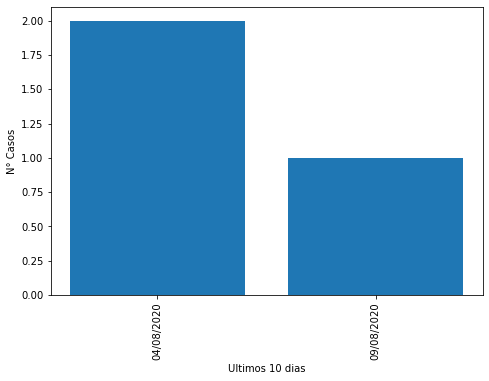

In [45]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(datas_casos['Datas'], datas_casos['Casos'])
ax.set_xlabel('Ultimos 10 dias')
ax.set_ylabel('N° Casos')
plt.xticks(datas_casos['Datas'],rotation=90)
plt.show()